In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time


In [2]:
# all the known virus miRNAs are used as positive examples
features_virus_mirnas = pd.read_csv('/content/drive/MyDrive/features_virus_miRNAs.csv')

# The negative set is composed of a random set of hsa hairpin-like sequences 
features_unlabeled_hairpins = pd.read_csv('/content/drive/MyDrive/features_unlabeled_hairpins.csv') # Hairpins from hsa genome

In [3]:
features_virus_mirnas.drop('sequence_names', inplace=True, axis=1)

In [4]:
features_unlabeled_hairpins.drop('sequence_names', inplace=True, axis=1)

In [5]:
features_unlabeled_hairpins['class'] = 0

In [6]:
features_virus_mirnas['class'] = 1

In [7]:
da = [features_virus_mirnas, features_unlabeled_hairpins]

In [8]:
df = pd.concat(da)
df.head()

,nt_proportion0,nt_proportion1,nt_proportion2,nt_proportion3,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,dinucleotide_proportion5,...,efe,ensemble_frequency,diversity,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4,class
0,0.292308,0.169231,0.200000,0.338462,0.109375,0.015625,0.078125,0.093750,0.062500,0.031250,...,-27.28,0.457857,1.67,0.007385,0.066635,-0.412308,-1.116667,-0.137436,-1.072000,1
1,0.276923,0.215385,0.230769,0.276923,0.125000,0.078125,0.046875,0.031250,0.078125,0.000000,...,-23.95,0.154283,5.77,0.017692,0.228730,-0.350769,-0.786207,-0.116923,-1.036364,1
2,0.242424,0.287879,0.227273,0.242424,0.061538,0.061538,0.061538,0.046154,0.061538,0.138462,...,-27.02,0.426696,2.62,0.007879,0.107199,-0.401515,-0.779412,-0.100379,-1.204545,1
3,0.200000,0.257143,0.300000,0.242857,0.028986,0.057971,0.057971,0.057971,0.057971,0.072464,...,-32.11,0.101080,6.03,0.020143,0.214866,-0.438571,-0.787179,-0.146190,-1.228000,1
4,0.258065,0.193548,0.225806,0.322581,0.098361,0.016393,0.049180,0.081967,0.049180,0.049180,...,-26.28,0.639769,0.94,0.004516,0.040681,-0.419355,-1.000000,-0.139785,-1.238095,1


In [9]:
df.fillna(value=0, inplace = True)

In [10]:
df = df.sample(frac=1)


positive_df = df.loc[df['class'] == 1]
negative_df = df.loc[df['class'] == 0][:569]

normal_distributed_df = pd.concat([positive_df, negative_df])


new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,nt_proportion0,nt_proportion1,nt_proportion2,nt_proportion3,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,dinucleotide_proportion5,...,efe,ensemble_frequency,diversity,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4,class
924218,0.400000,0.165000,0.165000,0.271000,0.190000,0.048000,0.060000,0.095000,0.09500,0.048000,...,-16.94,0.022000,21.21,0.028000,0.614000,-0.172000,-0.521000,-0.043000,-0.584000,0
5678,0.318000,0.118000,0.259000,0.306000,0.155000,0.024000,0.071000,0.060000,0.03600,0.012000,...,-13.12,0.027000,18.73,0.026000,0.751000,-0.128000,-0.341000,-0.043000,-0.545000,0
26,0.261538,0.153846,0.230769,0.353846,0.062500,0.062500,0.078125,0.062500,0.03125,0.031250,...,-26.11,0.120296,8.88,0.020154,0.379878,-0.381538,-0.992000,-0.190769,-1.127273,1
703576,0.271000,0.196000,0.308000,0.224000,0.075000,0.038000,0.123000,0.028000,0.07500,0.085000,...,-35.63,0.084000,10.87,0.014000,0.298000,-0.319000,-0.631000,-0.064000,-0.974000,0
299,0.294118,0.180392,0.184314,0.341176,0.094488,0.062992,0.055118,0.082677,0.03937,0.051181,...,-152.91,0.003369,21.21,0.013765,0.239560,-0.585882,-1.606452,-0.073235,-1.396262,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


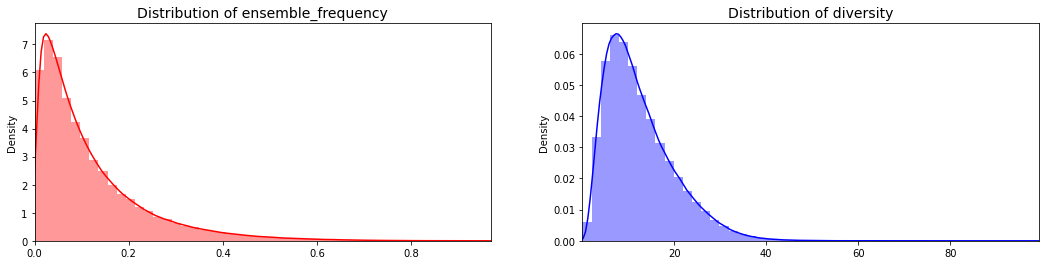

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df[' ensemble_frequency'].values
time_val = df[' diversity'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of ensemble_frequency', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of diversity', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

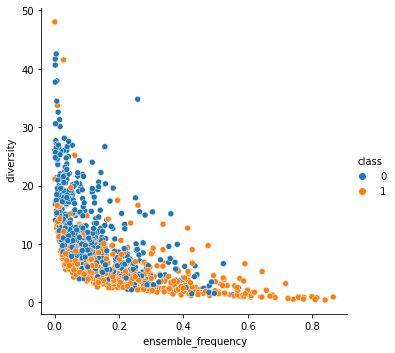

In [12]:
sns.relplot(x=" ensemble_frequency", y=" diversity", hue="class", data=new_df);


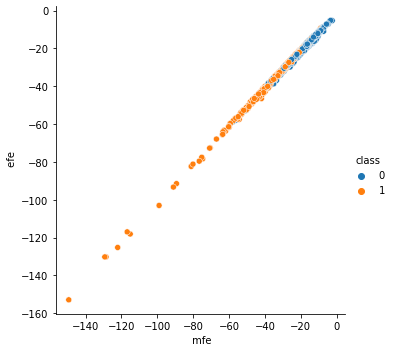

In [13]:
sns.relplot(x=" mfe", y=" efe", hue="class", data=new_df);


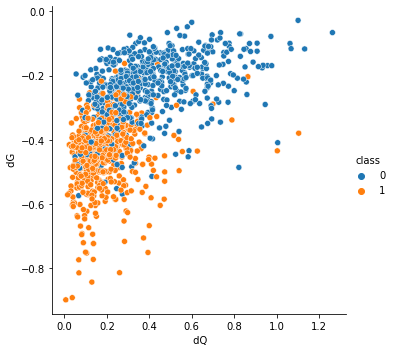

In [14]:
sns.relplot(x=" dQ", y=" dG", hue="class", data=new_df);


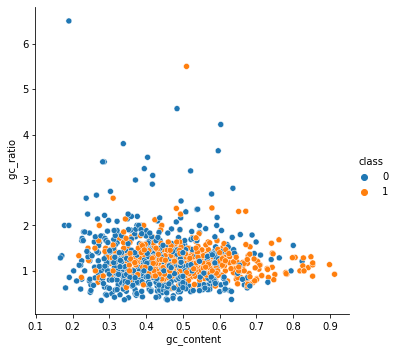

In [15]:
sns.relplot(x=" gc_content", y=" gc_ratio", hue="class", data=new_df);


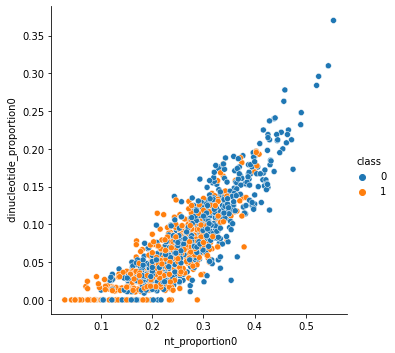

In [16]:
sns.relplot(x=" nt_proportion0", y=" dinucleotide_proportion0", hue="class", data=new_df);


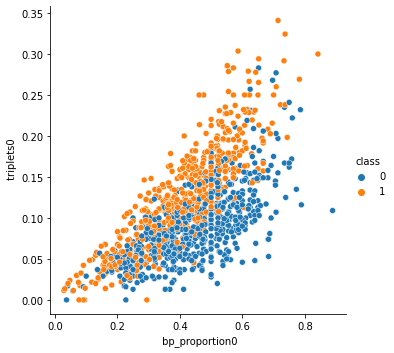

In [17]:
sns.relplot(x=" bp_proportion0", y=" triplets0", hue="class", data=new_df);


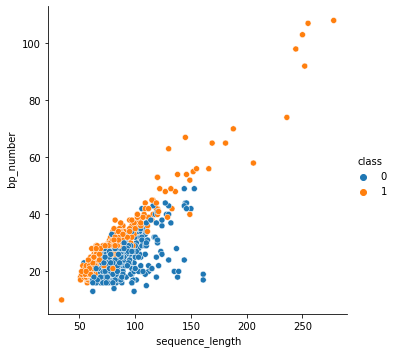

In [18]:
sns.relplot(x=" sequence_length", y=" bp_number", hue="class", data=new_df);


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


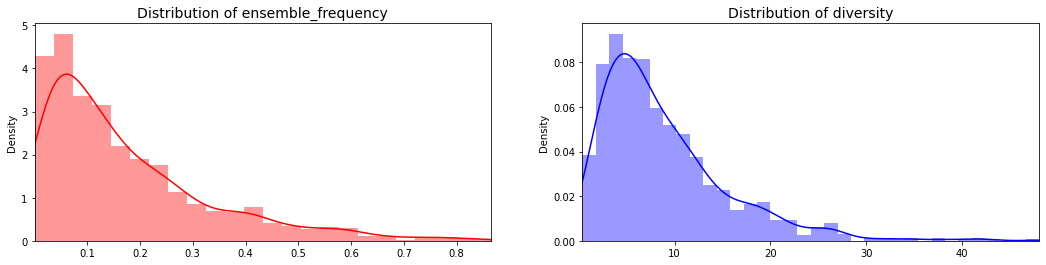

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = new_df[' ensemble_frequency'].values
time_val = new_df[' diversity'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of ensemble_frequency', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of diversity', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

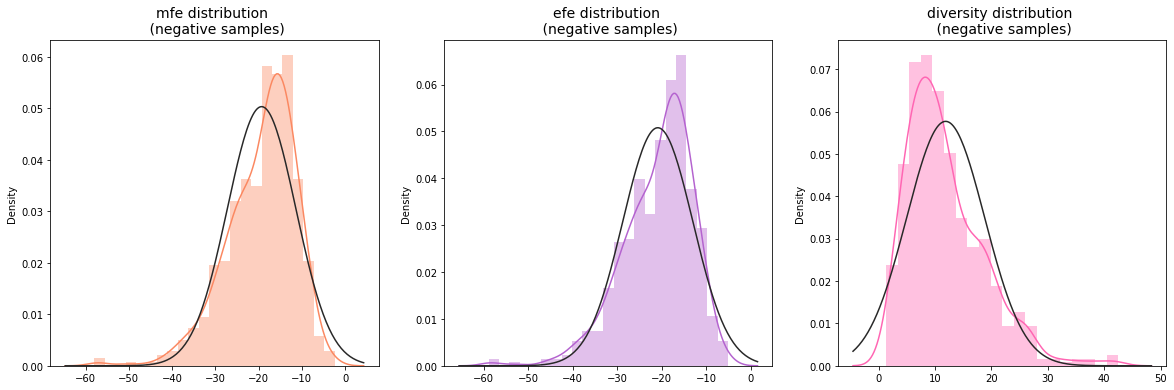

In [20]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df[' mfe'].loc[new_df['class'] == 0].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('mfe distribution \n (negative samples)', fontsize=14)

v12_fraud_dist = new_df[' efe'].loc[new_df['class'] == 0].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#b463cf')
ax2.set_title('efe distribution \n (negative samples)', fontsize=14)


v10_fraud_dist = new_df[' diversity'].loc[new_df['class'] == 0].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#ff66b3')
ax3.set_title('diversity distribution \n (negative samples)', fontsize=14)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

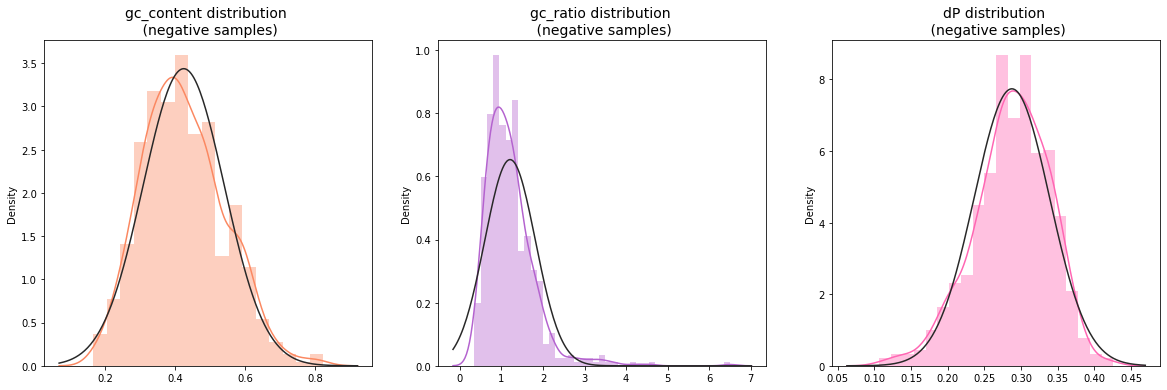

In [21]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df[' gc_content'].loc[new_df['class'] == 0].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('gc_content distribution \n (negative samples)', fontsize=14)

v12_fraud_dist = new_df[' gc_ratio'].loc[new_df['class'] == 0].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#b463cf')
ax2.set_title('gc_ratio distribution \n (negative samples)', fontsize=14)


v10_fraud_dist = new_df[' dP'].loc[new_df['class'] == 0].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#ff66b3')
ax3.set_title('dP distribution \n (negative samples)', fontsize=14)

plt.show()